In [1]:
import wntr
import pandas as pd

# Custom function library

In [2]:
from math import sqrt

def distance_between_points(x1: float, y1: float, x2: float, y2: float) -> float:
    """
    Returns distance between 2 points on a flat plane using pythagoreas theorem
    Arguments: x1, y1 - first point coordinates (floats)
               x2, y2 - second point coordinates (floats)
    Returns: distance on a flat plane (float)
    """
    return sqrt(((x1 - x2)**2) + ((y1 - y2)**2))

def get_closest_nodes(water_network: wntr.network.WaterNetworkModel, base_node_name: str, max_distance: float) -> list:
    """
    Finds nodes that are closest to base_node
    Arguments: water_network - WNTR Water Network Model (wntr.network.WaterNetworkModel)
               base_node_name - reference node name (str)
               max_distance - units in meters (float)
    Returns:   list of strings (names of closest nodes)
    """
    
    # get base node coordinates
    x_base, y_base = wn.get_node(base_node_name).coordinates
    
    # check each node if it's in base node's proximity, if so append to list
    closest_nodes = []
    for node_name in wn.node_name_list:
        x, y = wn.get_node(node_name).coordinates
        if distance_between_points(x_base, y_base , x, y) <= max_distance:
            closest_nodes.append(node_name)
            
    # remove the base node from return list (distance from itself is always 0)
    closest_nodes.remove(base_node_name)
    
    return closest_nodes

# Read a water network model, simulate without leaks

In [3]:
inp_file = 'Walkerton_v1.inp'
wn = wntr.network.WaterNetworkModel(inp_file)
sim = wntr.sim.WNTRSimulator(wn)
results = sim.run_sim()

c:\users\pc\anaconda3\envs\wodociagi\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Which node will have its pressure predicted?

In [4]:
main_node = 'J126'

# get the nodes pressure over time
main_node_pressure = results.node['pressure'].loc[:, main_node]
main_node_pressure

0          50.280371
3600       49.832474
7200       49.627485
10800      49.422497
14400      49.217508
             ...    
2404800    48.586008
2408400    48.294338
2412000    47.970041
2415600    47.735752
2419200    47.672241
Name: J126, Length: 673, dtype: float64

Which nodes are the closest to the main node?

In [5]:
max_distance = 400.0           # how far-away nodes are we considering?
closest_nodes = get_closest_nodes(water_network=wn,
                                  base_node_name=main_node,
                                  max_distance=max_distance)
print(f'{len(closest_nodes)} nodes found.')

16 nodes found.


Get pressure over time for each close node

In [6]:
closest_nodes_pressure = []
for node in closest_nodes:
    closest_nodes_pressure.append(results.node['pressure'].loc[:, node])
    
# merge into a single DataFrame
closest_nodes_pressure = pd.concat(closest_nodes_pressure, axis=1)

# add main node to have a complete dataset in single DataFrame
noLeaks_data = pd.concat([closest_nodes_pressure, main_node_pressure], axis=1)
    
noLeaks_data

,J45,J54,J62,J63,J64,J123,J124,J125,J203,J204,J230,J231,J232,J257,J258,T2,J126
0,69.542280,57.311123,66.621872,61.001113,53.440943,56.370426,51.390399,54.530401,47.971105,61.101091,35.450371,51.100942,61.515525,55.181147,55.181123,20.000000,50.280371
3600,69.093031,57.014040,66.172846,60.552542,52.992359,55.922528,50.942501,54.082504,47.674022,60.804008,35.002474,50.652358,61.066954,54.884031,54.884040,20.074567,49.832474
7200,68.888042,56.809052,65.967858,60.347553,52.787370,55.717540,50.737513,53.877515,47.469033,60.599020,34.797485,50.447369,60.861965,54.679043,54.679051,19.869578,49.627485
10800,68.683053,56.604063,65.762869,60.142565,52.582382,55.512551,50.532524,53.672526,47.264045,60.394031,34.592496,50.242381,60.656977,54.474054,54.474063,19.664589,49.422497
14400,68.478065,56.399074,65.557880,59.937576,52.377393,55.307562,50.327535,53.467538,47.059056,60.189042,34.387508,50.037392,60.451988,54.269065,54.269074,19.459601,49.217508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404800,67.850277,55.863559,64.928925,59.306642,51.745449,54.676365,49.696188,52.836203,46.523438,59.653347,33.756007,49.405443,59.622876,53.733529,53.733556,19.150765,48.586008
2408400,67.558793,55.542686,64.637401,59.015039,51.453848,54.384695,49.404518,52.544533,46.202566,59.332475,33.464337,49.113842,59.331273,53.412663,53.412683,18.757924,48.294338
2412000,67.234539,55.212249,64.313137,58.690758,51.129567,54.060398,49.080220,52.220236,45.872128,59.002037,33.140039,48.789561,59.006992,53.082226,53.082245,18.412340,47.970041
2415600,66.996231,54.946164,64.076068,58.455807,50.895623,53.825807,48.845780,51.985782,45.606146,58.736132,32.905752,48.555622,58.970219,52.816149,52.816164,18.077454,47.735752


# Implement linear regression

Shuffling dataset in order not to get a skewed test set

In [7]:
from sklearn.utils import shuffle
noLeaks_data_shuffled = shuffle(noLeaks_data)
noLeaks_data_shuffled

,J45,J54,J62,J63,J64,J123,J124,J125,J203,J204,J230,J231,J232,J257,J258,T2,J126
7200,68.888042,56.809052,65.967858,60.347553,52.787370,55.717540,50.737513,53.877515,47.469033,60.599020,34.797485,50.447369,60.861965,54.679043,54.679051,19.869578,49.627485
766800,67.821691,55.827230,64.900328,59.278026,51.716833,54.647733,49.667555,52.807571,46.487109,59.617018,33.727374,49.376828,59.594260,53.697202,53.697227,19.095476,48.557376
586800,68.207111,56.248589,65.284922,59.661207,52.099336,55.030662,50.050383,53.190408,46.908399,60.038257,34.110099,49.759327,59.843978,54.118552,54.118584,19.605308,48.940101
1360800,69.650620,57.376976,66.727488,61.101864,53.540049,56.468869,51.488591,54.628615,48.036786,61.166644,35.548307,51.200040,61.284636,55.247007,55.246971,19.963679,50.378309
262800,67.649941,55.568856,64.729755,59.109447,51.549264,54.479431,49.499404,52.639407,46.228838,59.358824,33.559377,49.209263,59.623859,53.438847,53.438855,18.624256,48.389377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357200,69.352997,57.036781,66.430508,60.806004,53.244645,56.173310,51.193100,54.333118,47.696638,60.826531,35.252886,50.904638,61.079342,54.906822,54.906777,19.519335,50.082887
2336400,66.830850,54.756362,63.910417,58.289687,50.729302,53.659603,48.679545,51.819550,45.416323,58.546294,32.739487,48.389300,58.764278,52.626352,52.626361,17.828078,47.569487
1580400,65.375941,53.450926,62.451534,56.823998,49.260402,52.192600,47.212063,50.352110,44.110560,57.240286,31.271515,46.920385,56.666034,51.320881,51.320916,16.890757,46.101519
727200,66.920178,54.401609,63.996690,58.370338,50.808544,53.736110,48.755831,51.895856,45.061419,58.191277,32.815547,48.468535,58.553110,52.271693,52.271604,16.390902,47.645549


Divide dataset into train and test subsets

In [8]:
test_set_size = 70                            # dataset has 673 records overall
data_size = noLeaks_data_shuffled.shape[0]    # total number of rows

# separate X from Y
noLeaks_x = noLeaks_data_shuffled.loc[:, noLeaks_data_shuffled.columns != main_node]
noLeaks_y = noLeaks_data_shuffled.loc[:, noLeaks_data_shuffled.columns == main_node]

# get normalization stats for later
norm_mean = noLeaks_x.mean()
norm_std = noLeaks_x.std()

# train data (prenorm - pre normalization)
noLeaks_xtrain_prenorm = noLeaks_x[:-test_set_size]
noLeaks_ytrain = noLeaks_y[:-test_set_size]

# test data
noLeaks_xtest_prenorm = noLeaks_x[data_size-test_set_size:]
noLeaks_ytest = noLeaks_y[data_size-test_set_size:]

noLeaks_xtrain_prenorm

,J45,J54,J62,J63,J64,J123,J124,J125,J203,J204,J230,J231,J232,J257,J258,T2
7200,68.888042,56.809052,65.967858,60.347553,52.787370,55.717540,50.737513,53.877515,47.469033,60.599020,34.797485,50.447369,60.861965,54.679043,54.679051,19.869578
766800,67.821691,55.827230,64.900328,59.278026,51.716833,54.647733,49.667555,52.807571,46.487109,59.617018,33.727374,49.376828,59.594260,53.697202,53.697227,19.095476
586800,68.207111,56.248589,65.284922,59.661207,52.099336,55.030662,50.050383,53.190408,46.908399,60.038257,34.110099,49.759327,59.843978,54.118552,54.118584,19.605308
1360800,69.650620,57.376976,66.727488,61.101864,53.540049,56.468869,51.488591,54.628615,48.036786,61.166644,35.548307,51.200040,61.284636,55.247007,55.246971,19.963679
262800,67.649941,55.568856,64.729755,59.109447,51.549264,54.479431,49.499404,52.639407,46.228838,59.358824,33.559377,49.209263,59.623859,53.438847,53.438855,18.624256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411200,64.605265,52.696164,61.683142,56.059561,48.497686,51.429128,46.448850,49.588874,43.355974,56.485832,30.508565,46.157677,56.242332,50.566117,50.566159,16.173911
2368800,67.235099,54.677589,64.310732,58.682797,51.120499,54.047720,49.067364,52.207395,45.337347,58.467165,33.127000,48.780487,58.763350,52.547681,52.547583,16.572360
1620000,69.464106,57.183734,66.540962,60.915313,53.353499,56.282279,51.302000,54.442024,47.843544,60.973402,35.361716,51.013490,61.098085,55.053766,55.053729,19.754034
835200,68.988683,56.585755,66.067313,60.444782,52.884163,55.812725,50.832628,53.972636,47.245689,60.375639,34.892528,50.544160,60.866310,54.455816,54.455753,18.855936


Normalize X dataset

In [9]:
noLeaks_xtrain = (noLeaks_xtrain_prenorm - norm_mean) / norm_std
noLeaks_xtest = (noLeaks_xtest_prenorm - norm_mean) / norm_std

Convert data to numpy array

In [10]:
noLeaks_xtrain_array = noLeaks_xtrain.to_numpy()
noLeaks_xtest_array = noLeaks_xtest.to_numpy()
noLeaks_ytrain_array = noLeaks_ytrain.to_numpy()
noLeaks_ytest_array = noLeaks_ytest.to_numpy()

noLeaks_xtrain_array

array([[ 1.293e+00,  1.407e+00,  1.294e+00,  1.296e+00,  1.297e+00,  1.297e+00,  1.297e+00,  1.297e+00,  1.407e+00,  1.407e+00,  1.298e+00,  1.297e+00,  1.403e+00,  1.407e+00,  1.407e+00,  1.597e+00],
       [ 4.422e-01,  5.883e-01,  4.425e-01,  4.430e-01,  4.430e-01,  4.439e-01,  4.439e-01,  4.439e-01,  5.883e-01,  5.882e-01,  4.439e-01,  4.430e-01,  4.286e-01,  5.882e-01,  5.883e-01,  9.280e-01],
       [ 7.497e-01,  9.398e-01,  7.492e-01,  7.487e-01,  7.480e-01,  7.494e-01,  7.493e-01,  7.493e-01,  9.397e-01,  9.396e-01,  7.492e-01,  7.480e-01,  6.205e-01,  9.397e-01,  9.398e-01,  1.369e+00],
       [ 1.901e+00,  1.881e+00,  1.900e+00,  1.898e+00,  1.897e+00,  1.897e+00,  1.897e+00,  1.897e+00,  1.881e+00,  1.881e+00,  1.897e+00,  1.897e+00,  1.728e+00,  1.881e+00,  1.881e+00,  1.678e+00],
       [ 3.052e-01,  3.727e-01,  3.064e-01,  3.086e-01,  3.093e-01,  3.097e-01,  3.098e-01,  3.098e-01,  3.728e-01,  3.729e-01,  3.099e-01,  3.093e-01,  4.513e-01,  3.727e-01,  3.727e-01,  5.207e-

Create regression model, fit the data

In [11]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
regression.fit(noLeaks_xtrain_array, noLeaks_ytrain_array)

LinearRegression()

# Review the model

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

regression_y_pred = regression.predict(noLeaks_xtest_array)

print(f'Coefficients: {regression.coef_}\n')
print(f'Mean squared error: {mean_squared_error(noLeaks_ytest_array, regression_y_pred)}\n')
print(f'Coefficient of determination R^2: {r2_score(noLeaks_ytest_array, regression_y_pred)}\n')

Coefficients: [[-3.914e-07 -1.615e+00  6.462e-07  2.310e-05  7.567e-01  8.778e-02  3.366e-01  5.111e-02  1.330e+00 -2.705e-01  7.780e-01 -7.567e-01 -2.244e-05 -1.685e-06  5.560e-01  9.101e-12]]

Mean squared error: 1.5723124785205081e-28

Coefficient of determination R^2: 1.0



See the errors

In [13]:
errors_linear = noLeaks_ytest - regression_y_pred
errors_linear

,J126
111600,-7.105427e-15
626400,-2.842171e-14
673200,0.000000e+00
1476000,7.105427e-15
288000,0.000000e+00
...,...
1357200,-1.421085e-14
2336400,-1.421085e-14
1580400,-1.421085e-14
727200,7.105427e-15


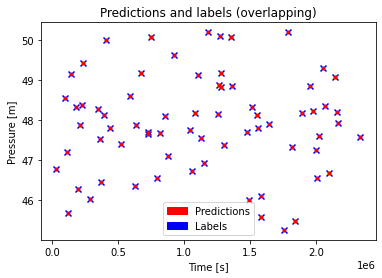

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# reshape to 1-dimensional numpy array
predictions = regression_y_pred.flatten()

# convert it to DataFrame
predictions_df = pd.DataFrame(predictions, index=noLeaks_ytest.index.copy())

# plot setup
ax = plt.gca()
ax.set_title(label='Predictions and labels')
ax.set_xlabel(xlabel='Time [s]')
ax.set_ylabel(ylabel='Pressure [m]')
red_patch = mpatches.Patch(color='red', label='Predictions')
blue_patch = mpatches.Patch(color='blue', label='Labels')
ax.legend(handles=[red_patch, blue_patch])

# plot labels
ax.scatter(noLeaks_ytest.index, noLeaks_ytest, color='blue', marker='x')

# plot predictions
ax.scatter(predictions_df.index, predictions_df, color='red', marker='.')

# Read a water network model, simulate with leaks (leak on main node)

Read water network model

In [15]:
inp_file = 'Walkerton_v1.inp'
wn_leaks = wntr.network.WaterNetworkModel(inp_file)

Add a leak on main node

In [16]:
leak_node = wn_leaks.get_node(main_node)
leak_node.add_leak(wn_leaks, area=0.01, start_time=50*3600, end_time=90*3600)

Run the simulation

In [17]:
sim_leaks = wntr.sim.WNTRSimulator(wn_leaks)
results_leaks = sim_leaks.run_sim()
results_leaks.node['pressure']

c:\users\pc\anaconda3\envs\wodociagi\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,...,J544,J546,JPMP51,JPMP63,JPMP72,T1,T2,R5,R6,R7
0,36.011416,30.044852,29.924852,31.958688,32.148688,45.531102,31.841401,28.841400,33.861399,43.310270,...,81.794900,77.808845,51.588782,96.37,89.980504,26.000000,20.000000,0.0,0.0,0.0
3600,36.643471,30.803467,30.683467,32.673468,32.863468,45.903506,32.473456,29.473455,34.493454,43.604068,...,24.449732,21.179732,72.180000,96.37,118.600000,26.220289,20.074567,0.0,0.0,0.0
7200,36.438482,30.598478,30.478478,32.468479,32.658479,45.698517,32.268468,29.268467,34.288465,43.399079,...,24.244744,20.974744,72.180000,96.37,118.600000,26.220289,19.869578,0.0,0.0,0.0
10800,36.233493,30.393490,30.273490,32.263490,32.453490,45.493529,32.063479,29.063478,34.083477,43.194090,...,24.039755,20.769755,72.180000,96.37,118.600000,26.220289,19.664589,0.0,0.0,0.0
14400,36.028505,30.188501,30.068501,32.058502,32.248502,45.288540,31.858490,28.858489,33.878488,42.989102,...,23.834766,20.564766,72.180000,96.37,118.600000,26.220289,19.459601,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404800,35.267342,29.429940,29.309940,31.299027,31.489027,44.523769,31.097018,28.096982,33.116974,42.223775,...,23.074504,19.804504,72.180000,96.37,118.600000,25.635456,19.150731,0.0,0.0,0.0
2408400,35.057655,29.223778,29.103778,31.091635,31.281635,44.307187,30.887472,27.887437,32.907458,42.006046,...,22.829065,19.559065,72.180000,96.37,118.600000,25.436366,18.757891,0.0,0.0,0.0
2412000,34.753025,28.920778,28.800778,30.788068,30.978068,44.000073,30.582729,27.582662,32.602715,41.698357,...,22.514331,19.244331,72.180000,96.37,118.600000,25.136612,18.412307,0.0,0.0,0.0
2415600,34.448484,28.605885,28.485885,30.476774,30.666774,43.714159,30.278469,27.278468,32.298467,41.417219,...,22.304629,19.034629,72.180000,96.37,118.600000,24.801042,18.077421,0.0,0.0,0.0


Get pressures in closest nodes

In [19]:
closest_nodes_pressure_leak = []
for node in closest_nodes:
    closest_nodes_pressure_leak.append(results_leaks.node['pressure'].loc[:, node])

# pressures for close nodes
Leaks_xtest_prenorm = pd.concat(closest_nodes_pressure_leak, axis=1)

# pressures for main node (the one with the leak)
Leaks_ytest = results_leaks.node['pressure'].loc[:, main_node]

# normalize x data just like in training set
Leaks_xtest = (Leaks_xtest_prenorm - norm_mean) / norm_std

Leaks_xtest

,J45,J54,J62,J63,J64,J123,J124,J125,J203,J204,J230,J231,J232,J257,J258,T2
0,1.814716,1.826170,1.815639,1.817299,1.817809,1.818227,1.818305,1.818299,1.826225,1.826266,1.818386,1.817812,1.905303,1.826171,1.826171,1.709784
3600,1.456352,1.578334,1.457481,1.459539,1.460097,1.460913,1.461000,1.460992,1.578393,1.578438,1.461089,1.460100,1.560521,1.578310,1.578335,1.774236
7200,1.292833,1.407326,1.293975,1.296049,1.296634,1.297382,1.297472,1.297465,1.407388,1.407435,1.297565,1.296637,1.402962,1.407303,1.407328,1.597053
10800,1.129315,1.236318,1.130469,1.132560,1.133171,1.133850,1.133945,1.133937,1.236383,1.236432,1.134041,1.133174,1.245403,1.236297,1.236320,1.419870
14400,0.965796,1.065310,0.966963,0.969070,0.969708,0.970319,0.970417,0.970409,1.065378,1.065429,0.970518,0.969711,1.087845,1.065290,1.065312,1.242686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404800,0.464986,0.618539,0.465260,0.465839,0.465753,0.466749,0.466740,0.466741,0.618529,0.618522,0.466730,0.465753,0.450545,0.618505,0.618538,0.975714
2408400,0.232471,0.350857,0.232731,0.233269,0.233224,0.234067,0.234063,0.234064,0.350852,0.350848,0.234059,0.233224,0.226412,0.350831,0.350857,0.636159
2412000,-0.026185,0.075196,-0.025912,-0.025363,-0.025366,-0.024643,-0.024642,-0.024642,0.075195,0.075195,-0.024640,-0.025366,-0.022838,0.075173,0.075196,0.337452
2415600,-0.216282,-0.146780,-0.215007,-0.212749,-0.211919,-0.211790,-0.211664,-0.211675,-0.146691,-0.146625,-0.211535,-0.211915,-0.051102,-0.146795,-0.146778,0.047992


# Review model in case of main node leak 

Only the time period with a leak will really matter here

In [20]:
leak_regression_y_pred = regression.predict(Leaks_xtest)

print(f'Mean squared error: {mean_squared_error(Leaks_ytest, leak_regression_y_pred)}\n')
print(f'Coefficient of determination R^2: {r2_score(Leaks_ytest, leak_regression_y_pred)}\n')

Mean squared error: 3.3695304022323924

Coefficient of determination R^2: 0.9718505131988617



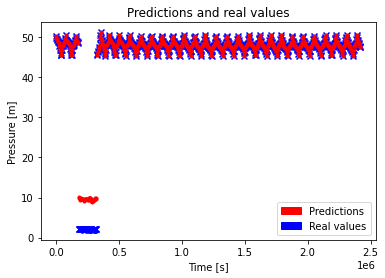

In [23]:
# get predictions on leak data
leak_regression_y_pred = regression.predict(Leaks_xtest)
leak_regression_y_pred

# reshape to 1-dimensional numpy array
leak_predictions = leak_regression_y_pred.flatten()

# convert it to DataFrame
leak_predictions_df = pd.DataFrame(leak_predictions, index=Leaks_ytest.index.copy())
leak_predictions_df

# plot setup
leak_ax = plt.gca()
leak_ax.set_title(label='Predictions and real values')
leak_ax.set_xlabel(xlabel='Time [s]')
leak_ax.set_ylabel(ylabel='Pressure [m]')
leak_red_patch = mpatches.Patch(color='red', label='Predictions')
leak_blue_patch = mpatches.Patch(color='blue', label='Real values')
leak_ax.legend(handles=[leak_red_patch, leak_blue_patch])

# plot labels
leak_ax.scatter(Leaks_ytest.index, Leaks_ytest, color='blue', marker='x')

# plot predictions
leak_ax.scatter(leak_predictions_df.index, leak_predictions_df, color='red', marker='.')

You can clearly see the time period when the leak happend, the diffrence between real value and prediction is about 10 m

# Read a water network model, simulate with leaks (leaks on nearby nodes)

Read water network model

In [32]:
inp_file = 'Walkerton_v1.inp'
wn_leaks2 = wntr.network.WaterNetworkModel(inp_file)

Add a leak on main node

In [33]:
nearby_node = 'J125'                          # from nearby nodes list
leak_node2 = wn_leaks2.get_node(nearby_node)
leak_node2.add_leak(wn_leaks2, area=0.01, start_time=50*3600, end_time=90*3600)

Run the simulation

In [34]:
sim_leaks2 = wntr.sim.WNTRSimulator(wn_leaks2)
results_leaks2 = sim_leaks2.run_sim()
results_leaks2.node['pressure']

c:\users\pc\anaconda3\envs\wodociagi\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,...,J544,J546,JPMP51,JPMP63,JPMP72,T1,T2,R5,R6,R7
0,36.011416,30.044852,29.924852,31.958688,32.148688,45.531102,31.841401,28.841400,33.861399,43.310270,...,81.794900,77.808845,51.588782,96.37,89.980504,26.000000,20.000000,0.0,0.0,0.0
3600,36.643471,30.803467,30.683467,32.673468,32.863468,45.903506,32.473456,29.473455,34.493454,43.604068,...,24.449732,21.179732,72.180000,96.37,118.600000,26.220289,20.074567,0.0,0.0,0.0
7200,36.438482,30.598478,30.478478,32.468479,32.658479,45.698517,32.268468,29.268467,34.288465,43.399079,...,24.244744,20.974744,72.180000,96.37,118.600000,26.220289,19.869578,0.0,0.0,0.0
10800,36.233493,30.393490,30.273490,32.263490,32.453490,45.493529,32.063479,29.063478,34.083477,43.194090,...,24.039755,20.769755,72.180000,96.37,118.600000,26.220289,19.664589,0.0,0.0,0.0
14400,36.028505,30.188501,30.068501,32.058502,32.248502,45.288540,31.858490,28.858489,33.878488,42.989102,...,23.834766,20.564766,72.180000,96.37,118.600000,26.220289,19.459601,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404800,35.267234,29.429832,29.309832,31.298918,31.488918,44.523661,31.096909,28.096874,33.116866,42.223667,...,23.074395,19.804395,72.180000,96.37,118.600000,25.635348,19.150618,0.0,0.0,0.0
2408400,35.057543,29.223666,29.103666,31.091524,31.281524,44.307076,30.887360,27.887325,32.907347,42.005935,...,22.828954,19.558954,72.180000,96.37,118.600000,25.436255,18.757779,0.0,0.0,0.0
2412000,34.752913,28.920666,28.800666,30.787956,30.977956,43.999961,30.582617,27.582550,32.602604,41.698245,...,22.514219,19.244219,72.180000,96.37,118.600000,25.136500,18.412195,0.0,0.0,0.0
2415600,34.448372,28.605773,28.485773,30.476662,30.666662,43.714047,30.278358,27.278357,32.298355,41.417107,...,22.304517,19.034517,72.180000,96.37,118.600000,24.800930,18.077309,0.0,0.0,0.0


Get pressures in closest nodes

In [35]:
closest_nodes_pressure_leak2 = []
for node in closest_nodes:
    closest_nodes_pressure_leak2.append(results_leaks2.node['pressure'].loc[:, node])

# pressures for close nodes
Leaks_xtest_prenorm2 = pd.concat(closest_nodes_pressure_leak2, axis=1)

# pressures for main node (the one with the leak)
Leaks_ytest2 = results_leaks2.node['pressure'].loc[:, main_node]

# normalize x data just like in training set
Leaks_xtest2 = (Leaks_xtest_prenorm2 - norm_mean) / norm_std

Leaks_xtest2

,J45,J54,J62,J63,J64,J123,J124,J125,J203,J204,J230,J231,J232,J257,J258,T2
0,1.814716,1.826170,1.815639,1.817299,1.817809,1.818227,1.818305,1.818299,1.826225,1.826266,1.818386,1.817812,1.905303,1.826171,1.826171,1.709784
3600,1.456352,1.578334,1.457481,1.459539,1.460097,1.460913,1.461000,1.460992,1.578393,1.578438,1.461089,1.460100,1.560521,1.578310,1.578335,1.774236
7200,1.292833,1.407326,1.293975,1.296049,1.296634,1.297382,1.297472,1.297465,1.407388,1.407435,1.297565,1.296637,1.402962,1.407303,1.407328,1.597053
10800,1.129315,1.236318,1.130469,1.132560,1.133171,1.133850,1.133945,1.133937,1.236383,1.236432,1.134041,1.133174,1.245403,1.236297,1.236320,1.419870
14400,0.965796,1.065310,0.966963,0.969070,0.969708,0.970319,0.970417,0.970409,1.065378,1.065429,0.970518,0.969711,1.087845,1.065290,1.065312,1.242686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2404800,0.464898,0.618446,0.465172,0.465751,0.465665,0.466661,0.466652,0.466652,0.618436,0.618429,0.466642,0.465665,0.450460,0.618412,0.618446,0.975616
2408400,0.232382,0.350764,0.232642,0.233180,0.233135,0.233978,0.233974,0.233974,0.350759,0.350755,0.233970,0.233134,0.226326,0.350738,0.350764,0.636063
2412000,-0.026275,0.075102,-0.026002,-0.025452,-0.025455,-0.024733,-0.024731,-0.024731,0.075102,0.075102,-0.024729,-0.025455,-0.022924,0.075080,0.075102,0.337356
2415600,-0.216372,-0.146873,-0.215096,-0.212838,-0.212008,-0.211879,-0.211753,-0.211764,-0.146785,-0.146718,-0.211625,-0.212004,-0.051188,-0.146889,-0.146871,0.047895


# Review model in case of nearby node leak 

Only the time period with a leak will really matter here

In [36]:
leak_regression_y_pred2 = regression.predict(Leaks_xtest)

print(f'Mean squared error: {mean_squared_error(Leaks_ytest2, leak_regression_y_pred2)}\n')
print(f'Coefficient of determination R^2: {r2_score(Leaks_ytest2, leak_regression_y_pred2)}\n')

Mean squared error: 7.001208445725827

Coefficient of determination R^2: 0.9490129392431845



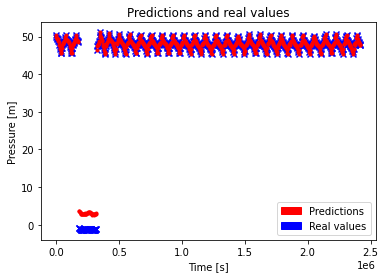

In [37]:
# get predictions on leak data
leak_regression_y_pred2 = regression.predict(Leaks_xtest2)
leak_regression_y_pred2

# reshape to 1-dimensional numpy array
leak_predictions2 = leak_regression_y_pred2.flatten()

# convert it to DataFrame
leak_predictions_df2 = pd.DataFrame(leak_predictions2, index=Leaks_ytest2.index.copy())
leak_predictions_df2

# plot setup
leak_ax2 = plt.gca()
leak_ax2.set_title(label='Predictions and real values')
leak_ax2.set_xlabel(xlabel='Time [s]')
leak_ax2.set_ylabel(ylabel='Pressure [m]')
leak_red_patch2 = mpatches.Patch(color='red', label='Predictions')
leak_blue_patch2 = mpatches.Patch(color='blue', label='Real values')
leak_ax2.legend(handles=[leak_red_patch2, leak_blue_patch2])

# plot labels
leak_ax2.scatter(Leaks_ytest2.index, Leaks_ytest2, color='blue', marker='x')

# plot predictions
leak_ax2.scatter(leak_predictions_df2.index, leak_predictions_df2, color='red', marker='.')

The diffrence is smaller, but still very noticable